<a href="https://colab.research.google.com/github/PrakulSmarty/EDA_Theory_03/blob/main/Module7_21BDS0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 21BDS0003
# Prakul Patel
# Github Link - https://github.com/PrakulSmarty/EDA_Theory_03/blob/main/Module7_21BDS0003.ipynb

# Importing the necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

# Loading the data

In [20]:
df = pd.read_csv("/content/Employee Attrition.csv")

In [21]:
print(df.keys())

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [22]:
df.head()
# print the columns present in the dataset
print(df.columns)
# print the top 5 rows in the dataset
print(df.head())

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Developm

# Checking Column Types

In [23]:
column_data_types = df.dtypes
print(column_data_types)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [24]:
df = df.select_dtypes(exclude=['object'])
print(df)

      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2         

In [25]:
#In the new overall dataframe, let's check if we have any missing values:
df.isna().sum()

,0
Age,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0
HourlyRate,0
JobInvolvement,0
JobLevel,0


# Plotting heatmap for overall data set

<Axes: >

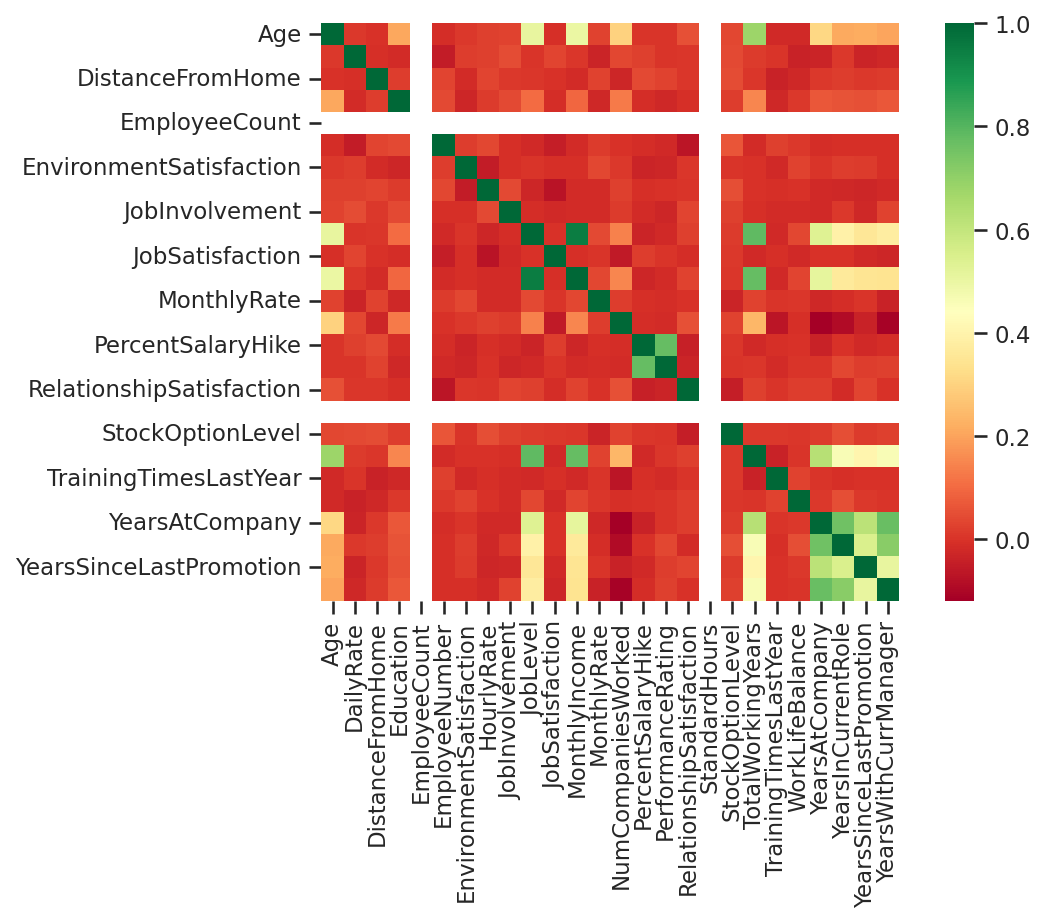

In [26]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

# lmplot from seaborn to see the relationship between Age and MonthlyIncome.

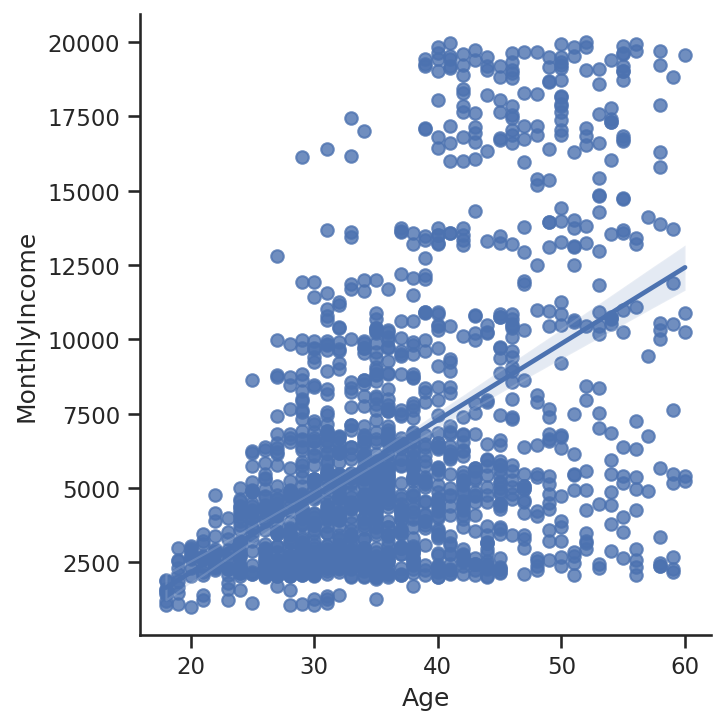

In [27]:
sns.lmplot(x = 'Age', y = 'MonthlyIncome', data = df)

In [28]:
#Scikit-learn needs to create features and target variables in arrays
# Preparing the data
X = df[['Age', 'TotalWorkingYears', 'YearsAtCompany']]  # Feature(s)
y = df[['MonthlyIncome']]  # Target variable

In [29]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [31]:
#R^2 can be determined using our test dataset in the LinearRegression.score() method:
#check prediction score/accuracy
regressor.score(X_test, y_test)

0.5988309371593324

In [32]:
#Before that, let's predict the y values with our model and evaluate it more. And a target variables DataFrame is also built:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,8463,4129.263560
1,4450,3029.478093
2,1555,1759.237786
3,9724,12553.881108
4,5914,8869.315110
5,2579,5010.752431
6,4230,3960.999315
7,2232,4279.594357
8,8865,12116.835605
9,2269,1494.822543


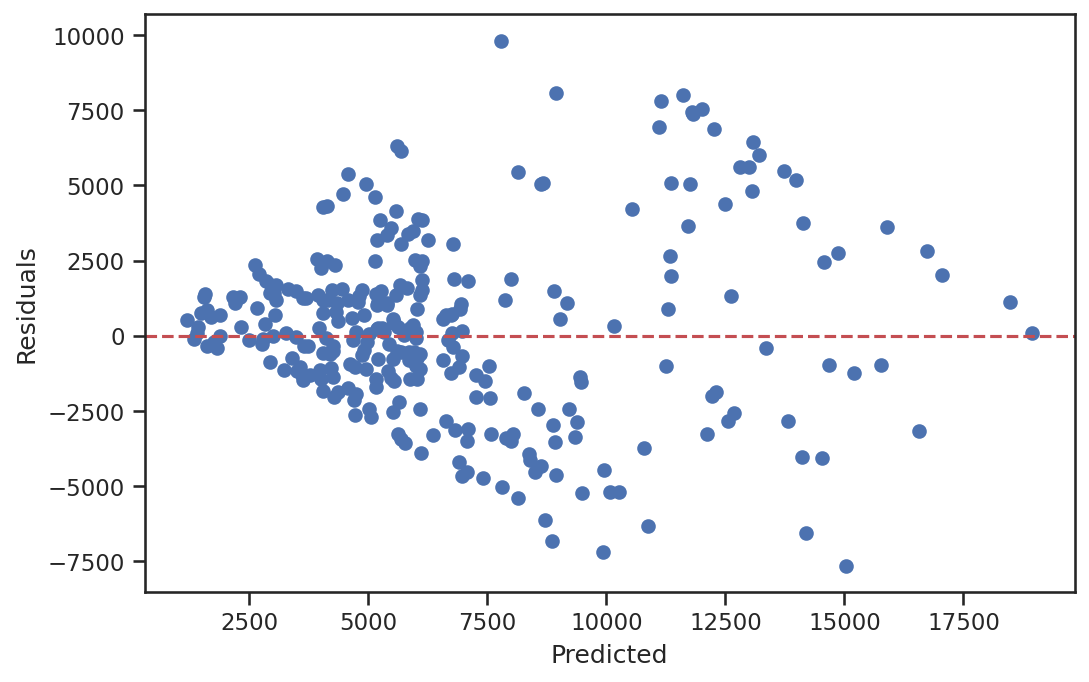

In [33]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()


# Difference between the actual values and the predicted values.

<Axes: >

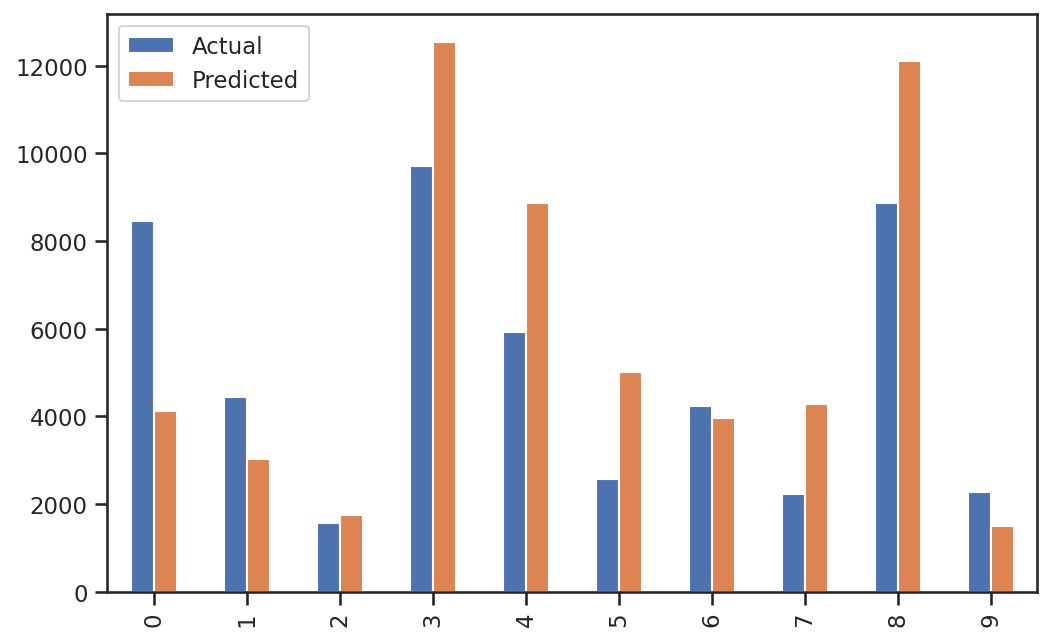

In [34]:
evaluate.head(10).plot(kind = 'bar')

# Computing accuracy

In [38]:
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE score: {root_mean_squared_error(y_test, y_pred)}")

R2 score: 0.5988309371593324
MAE score: 2227.6815968710757
MSE score: 8767713.813349491
RMSE score: 2961.032558643942
